# Transaction Data Analysis

In [66]:
# Transaction Data & RFM Segmentation
# Created by : Rizal Aji Santoso
# Data Source : https://www.kaggle.com/datasets/vipin20/transaction-data/data

# Import dataset dan libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

df = pd.read_csv("C:\\Users\\ThinkPad\\Documents\\1. P (Project)\\data_project\\Supermarket_kaggle\\transaction_data.csv")
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


# Assessing dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserId,1083818.0,2.410162e+05,142336.431264,-1.00,259392.00,302022.00,341355.0,384027.00
TransactionId,1083818.0,6.159417e+06,147634.093880,5900015.00,6026856.00,6166611.00,6289569.0,6397457.00
ItemCode,1083818.0,6.582687e+05,452631.426503,-1.00,460908.00,475293.00,488943.0,1894494.00
NumberOfItemsPurchased,1083818.0,2.865675e+01,654.243172,-242985.00,3.00,9.00,30.0,242985.00
CostPerItem,1083818.0,9.498798e+00,2308.138578,-15265.64,1.73,2.88,5.7,1696285.44


In [7]:
df.describe(exclude='number').T

,count,unique,top,freq
TransactionTime,1083818,23260,Sat Jan 12 10:41:00 IST 2019,2228
ItemDescription,1080910,4223,WHITE HANGING HEART T-LIGHT HOLDER,4738
Country,1083818,38,United Kingdom,990956


In [8]:
df.isna().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [9]:
df.duplicated().sum()

547246

In [10]:
df.sample(50)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
493622,316281,6185146,Tue Oct 16 06:45:00 IST 2018,1500639,HANGING JAM JAR T-LIGHT HOLDER,360,1.00,United Kingdom
128608,-1,6326947,Sun Jan 20 14:41:00 IST 2019,470022,LUNCH BAG SPACEBOY DESIGN,3,5.70,United Kingdom
984057,356265,6063948,Mon Jul 09 08:08:00 IST 2018,748608,VINTAGE BEAD PINK PURSE,9,1.15,United Kingdom
841310,263907,6115296,Mon Aug 20 05:16:00 IST 2018,487347,LUNCH BAG ALPHABET DESIGN,30,2.28,France
82693,318339,6263224,Sat Dec 15 12:47:00 IST 2018,466053,RED DINER WALL CLOCK,18,11.73,United Kingdom
748390,-1,6347858,Tue Jan 29 11:17:00 IST 2019,493710,MINI PLAYING CARDS GYMKHANA,3,1.15,United Kingdom
853231,347886,6105011,Sun Aug 12 04:32:00 IST 2018,316176,EDWARDIAN PARASOL NATURAL,36,8.22,United Kingdom
1060207,-1,6213185,Sun Nov 11 08:31:00 IST 2018,1764672,CHARLIE+LOLA PINK HOT WATER BOTTLE,3,4.55,United Kingdom
678114,303912,6026350,Fri Jun 08 08:06:00 IST 2018,444654,POTTERING IN THE SHED METAL SIGN,3,2.88,United Kingdom
193727,295071,6396445,Wed Feb 20 06:20:00 IST 2019,316176,EDWARDIAN PARASOL BLACK,108,8.22,United Kingdom


# Data cleaning

In [11]:
df_clean = df.copy()

In [12]:
# Mengubah format kolom transaction time menjadi datetime
df_clean['TransactionTime'] = pd.to_datetime(df_clean['TransactionTime'])
# Mengubah format kolom user id, transactionid, itemcode menjadi string (categorical)
df_clean[['UserId','TransactionId','ItemCode']] = df[['UserId','TransactionId','ItemCode']].astype(str)
# Menghilangkan value dibawah satu pada kolom numberofitemspurchased
df_clean = df_clean[df_clean['NumberOfItemsPurchased'] >= 1]
# Kapitalisasi semmua huruf pada kolom itemdescription
df_clean['ItemDescription'] = df_clean['ItemDescription'].str.upper()
# Impute value null poda kolom itemdescription dengan nilai dari kolom itemdescription lain dengan menggunakan itemcode sebagai referensi
df_clean['ItemDescription'] = df_clean.groupby('ItemCode')['ItemDescription'].fillna(method='ffill')
# Menghapus value null pada kolom itemdescription
df_clean = df_clean.dropna(subset='ItemDescription')
# Mengubah UserId unknown (-1) menjadi 0
df_clean['UserId']= df_clean['UserId'].replace('-1','0')
# Menambah kolom 'amount' sebagai hasil perkalian antara numberofitemspurchased dengan costoeritem
df_clean['Amount'] = df_clean['CostPerItem'] * df_clean['NumberOfItemsPurchased']
# Menghilangkan value : Adjust bad debt, amazon fee, bank charges, manual, samples
df_clean = df_clean[~df_clean['ItemDescription'].isin(['ADJUST BAD DEBT','POSTAGE','AMAZON FEE','BANK CHARGES','DOTCOM POSTAGE','MANUAL','POSTAGE','SAMPLES'])]
# Menghilangkan baris dengan kolom costperitem = 0
df_clean = df_clean[df_clean['CostPerItem'] > 0]
# Menghilangkan baris dengan tahun diatas 2019
df_clean = df_clean[df_clean['TransactionTime'].dt.year<= 2019]
# Menambah kolom year month untuk mengambil data bulan dan tahun dari kolom transaction time
df_clean['year_month'] = df_clean['TransactionTime'].dt.to_period('M')
# Re-arrange kolom
df_clean = df_clean[['TransactionTime','year_month','TransactionId','UserId','Country','ItemCode','ItemDescription','NumberOfItemsPurchased','CostPerItem','Amount']]
df_clean.info()


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_7932\1324776745.py:2: FutureWarning: Parsed string "Sat Feb 02 12:50:00 IST 2019" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df_clean['TransactionTime'] = pd.to_datetime(df_clean['TransactionTime'])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_7932\1324776745.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['ItemDescription'] = df_clean.groupby('ItemCode')['ItemDescription'].fillna(method='ffill')


<class 'pandas.core.frame.DataFrame'>
Index: 1050164 entries, 0 to 1083817
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   TransactionTime         1050164 non-null  datetime64[ns]
 1   year_month              1050164 non-null  period[M]     
 2   TransactionId           1050164 non-null  object        
 3   UserId                  1050164 non-null  object        
 4   Country                 1050164 non-null  object        
 5   ItemCode                1050164 non-null  object        
 6   ItemDescription         1050164 non-null  object        
 7   NumberOfItemsPurchased  1050164 non-null  int64         
 8   CostPerItem             1050164 non-null  float64       
 9   Amount                  1050164 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 88.1+ MB


In [13]:
df_clean.isna().sum()

TransactionTime           0
year_month                0
TransactionId             0
UserId                    0
Country                   0
ItemCode                  0
ItemDescription           0
NumberOfItemsPurchased    0
CostPerItem               0
Amount                    0
dtype: int64

### Mengatasi Outlier

array([[<Axes: title={'center': 'TransactionTime'}>,
        <Axes: title={'center': 'NumberOfItemsPurchased'}>],
       [<Axes: title={'center': 'CostPerItem'}>,
        <Axes: title={'center': 'Amount'}>]], dtype=object)

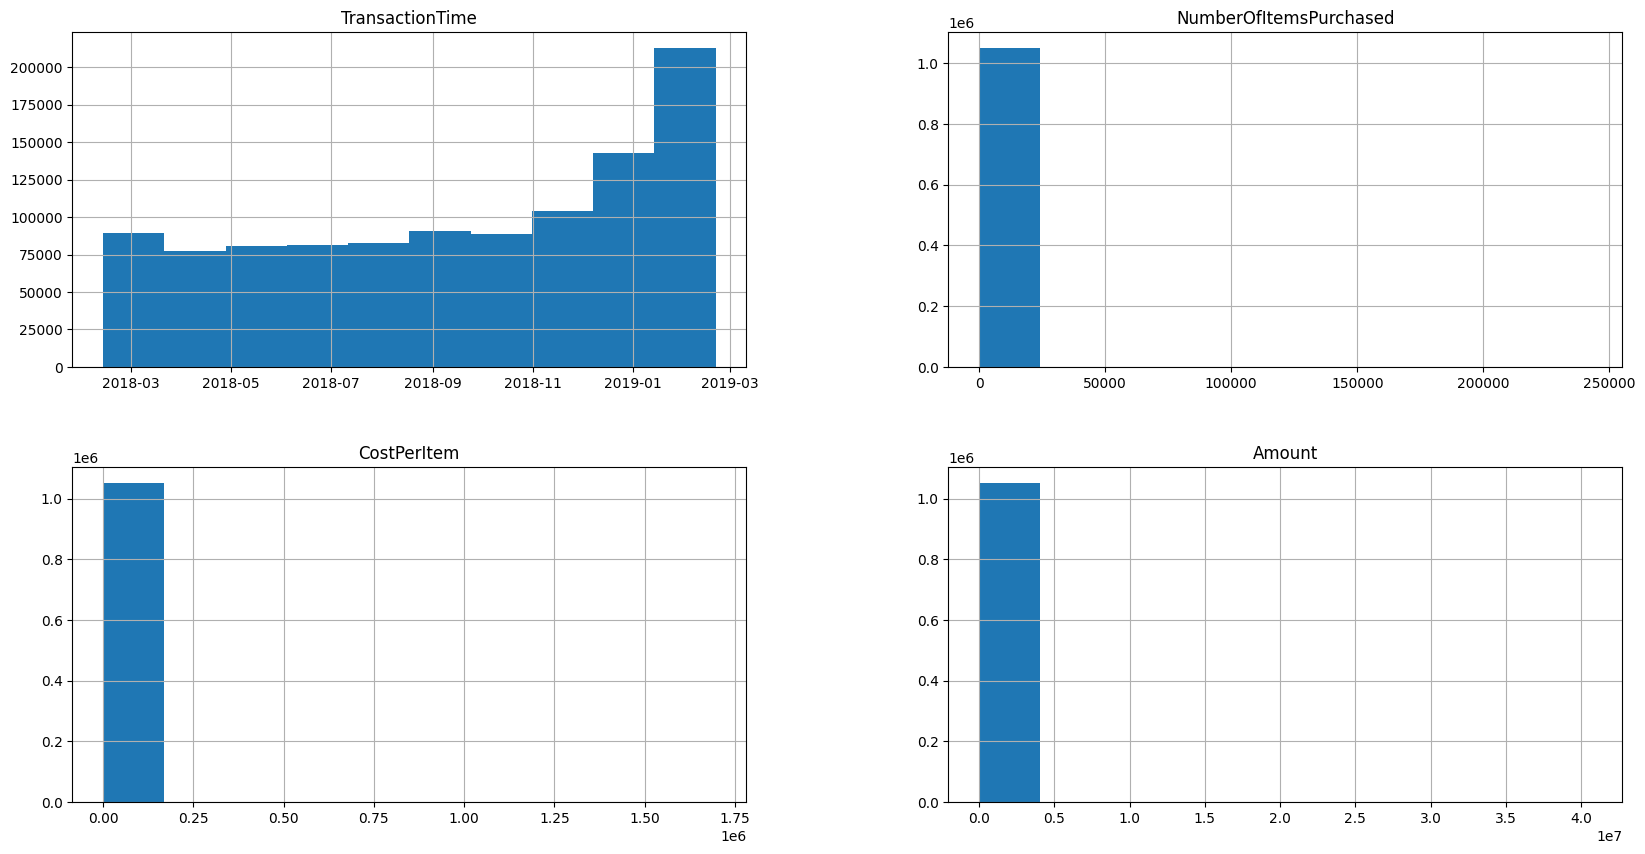

In [14]:
df_clean.hist(figsize=(20,10))

In [15]:
# Menemukan batas atas dan batas bawah pada kolom CostPerItem
q3_cost = df_clean['CostPerItem'].quantile(0.75)
q1_cost = df_clean['CostPerItem'].quantile(0.25)
t_cost = q3_cost - q1_cost

outlier_above = q3_cost+1.5*t_cost
outlier_below = q1_cost-1.5*t_cost

print(f'Batas atas cost : {outlier_above}')
print(f'Batas bawah cost : {outlier_below}')

# Menemukan batas atas dan batas bawah pada kolom NumberOfItemsPurchased
q3_items = df_clean['NumberOfItemsPurchased'].quantile(0.75)
q1_items = df_clean['NumberOfItemsPurchased'].quantile(0.25)
t_items = q3_items - q1_items

items_outlier_above = q3_items+1.5*t_items
items_outlier_below = q1_items-1.5*t_items

print(f'Batas atas items : {items_outlier_above}')
print(f'Batas bawah items : {items_outlier_below}')

Batas atas cost : 11.655000000000001
Batas bawah cost : -4.225
Batas atas items : 78.0
Batas bawah items : -42.0


In [16]:
df_clean = df_clean[(df_clean['CostPerItem'] > outlier_below)&(df_clean['CostPerItem'] <= outlier_above) & (df_clean['NumberOfItemsPurchased'] > items_outlier_below) &( df_clean['NumberOfItemsPurchased'] <= items_outlier_above)]

<Axes: xlabel='NumberOfItemsPurchased'>

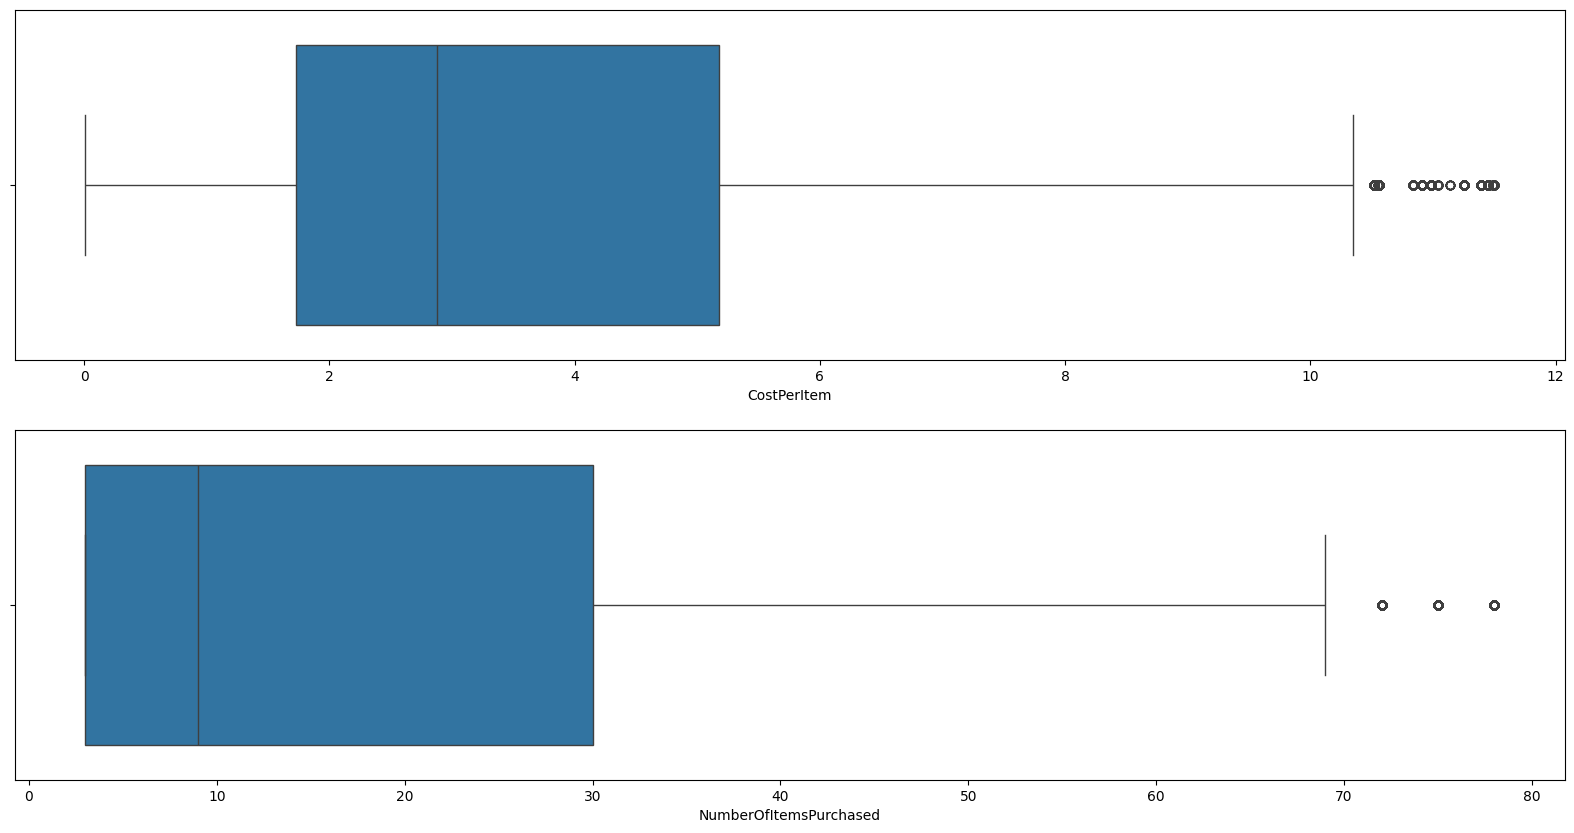

In [17]:
fig,axes = plt.subplots(2,1,figsize=(20,10))
sns.boxplot(ax=axes[0],x=df_clean['CostPerItem'])
sns.boxplot(ax=axes[1],x=df_clean['NumberOfItemsPurchased'])

array([[<Axes: title={'center': 'TransactionTime'}>,
        <Axes: title={'center': 'NumberOfItemsPurchased'}>],
       [<Axes: title={'center': 'CostPerItem'}>,
        <Axes: title={'center': 'Amount'}>]], dtype=object)

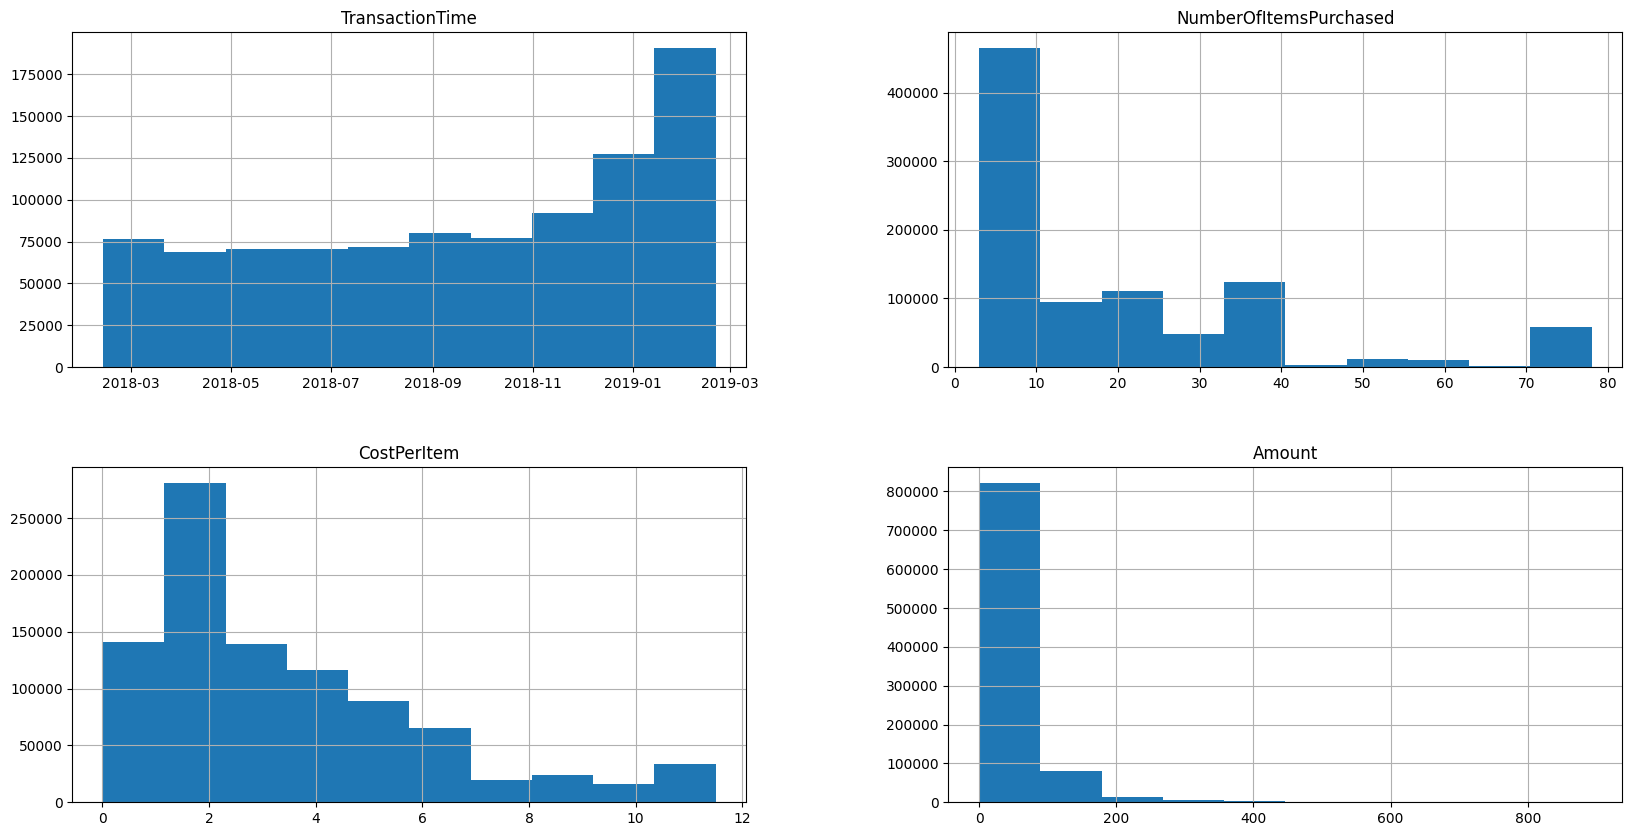

In [18]:
df_clean.hist(figsize=(20,10))

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925390 entries, 1 to 1083817
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   TransactionTime         925390 non-null  datetime64[ns]
 1   year_month              925390 non-null  period[M]     
 2   TransactionId           925390 non-null  object        
 3   UserId                  925390 non-null  object        
 4   Country                 925390 non-null  object        
 5   ItemCode                925390 non-null  object        
 6   ItemDescription         925390 non-null  object        
 7   NumberOfItemsPurchased  925390 non-null  int64         
 8   CostPerItem             925390 non-null  float64       
 9   Amount                  925390 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5), period[M](1)
memory usage: 77.7+ MB


In [20]:
df_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
TransactionTime,925390,2018-09-18 00:52:50.529052416,2018-02-12 04:26:00,2018-06-11 09:02:00,2018-10-03 09:20:00,2019-01-01 10:18:00,2019-02-20 08:50:00,NaN
NumberOfItemsPurchased,925390.0,18.456249,3.0,3.0,9.0,30.0,78.0,19.171671
CostPerItem,925390.0,3.581534,0.01,1.73,2.88,5.18,11.5,2.659467
Amount,925390.0,48.332949,0.03,13.68,32.94,65.88,893.1,54.446091


In [21]:
df_clean.describe(exclude='number').T

,count,unique,top,freq,mean,min,25%,50%,75%,max
TransactionTime,925390,NaN,NaN,NaN,2018-09-18 00:52:50.529052416,2018-02-12 04:26:00,2018-06-11 09:02:00,2018-10-03 09:20:00,2019-01-01 10:18:00,2019-02-20 08:50:00
year_month,925390,13,2019-01,128668,NaN,NaN,NaN,NaN,NaN,NaN
TransactionId,925390,18169,6309435,1932,NaN,NaN,NaN,NaN,NaN,NaN
UserId,925390,4192,0,228296,NaN,NaN,NaN,NaN,NaN,NaN
Country,925390,38,United Kingdom,854520,NaN,NaN,NaN,NaN,NaN,NaN
ItemCode,925390,3115,1787079,6804,NaN,NaN,NaN,NaN,NaN,NaN
ItemDescription,925390,3793,WHITE HANGING HEART T-LIGHT HOLDER,3918,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_clean

,TransactionTime,year_month,TransactionId,UserId,Country,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Amount
1,2018-12-26 09:06:00,2018-12,6283376,337701,United Kingdom,482370,LONDON BUS COFFEE MUG,3,3.52,10.56
2,2019-02-15 09:45:00,2019-02,6385599,267099,France,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,64.80
3,2018-06-22 07:14:00,2018-06,6044973,380478,United Kingdom,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,5.19
4,2018-09-10 11:58:00,2018-09,6143225,0,United Kingdom,1733592,WASHROOM METAL SIGN,3,3.40,10.20
5,2019-01-11 09:50:00,2019-01,6307136,285957,United Kingdom,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,42.24
...,...,...,...,...,...,...,...,...,...,...
1083812,2018-09-19 06:23:00,2018-09,6153092,261681,Switzerland,477330,ALARM CLOCK BAKELIKE IVORY,12,5.18,62.16
1083813,2018-06-18 09:18:00,2018-06,6040298,313131,EIRE,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,68.40
1083814,2019-02-16 09:14:00,2019-02,6387117,295743,United Kingdom,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,68.34
1083815,2019-02-05 05:26:00,2019-02,6361817,0,United Kingdom,497595,DOILY THANK YOU CARD,15,1.15,17.25


# EDA

## Menampilkan pivot table untuk mengetahui total sales tiap bulan dari masing-masing negara

In [62]:
pivot_country = pd.pivot_table(data=df_clean, columns='year_month', index='Country', values='Amount', aggfunc='sum')
pivot_country_total = pd.pivot_table(data=df_clean, columns='year_month', index='Country', values='Amount', aggfunc='sum', margins=True, margins_name='Total Sales')
pivot_country_total

year_month,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,Total Sales
Country,,,,,,,,,,,,,,
Australia,6138.24,10940.64,12522.66,6313.44,4227.30,14367.12,5973.48,18307.38,9235.44,5374.32,22403.82,670.32,2225.76,118699.92
Austria,740.40,NaN,3105.36,1045.44,2219.04,5041.86,5237.52,3191.52,16344.36,NaN,7245.12,8792.94,4220.64,57184.20
Bahrain,NaN,NaN,NaN,NaN,NaN,2059.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2059.56
Belgium,3446.16,9417.96,4703.34,17511.84,22501.92,12759.90,26391.00,13540.44,23663.58,11368.80,35189.40,41749.56,13785.36,236029.26
Brazil,NaN,NaN,NaN,NaN,8028.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8028.12
Canada,NaN,NaN,NaN,1166.88,NaN,NaN,NaN,14855.16,NaN,428.40,NaN,NaN,NaN,16450.44
Channel Islands,1955.28,NaN,2962.44,23075.76,1685.88,4241.58,10670.76,NaN,4216.08,16352.94,26737.02,10609.20,1363.68,103870.62
Cyprus,10077.72,1832.88,12400.50,8597.94,NaN,NaN,7329.84,NaN,NaN,NaN,22286.28,3552.30,NaN,66077.46
Czech Republic,NaN,NaN,NaN,3640.32,NaN,NaN,NaN,NaN,NaN,NaN,1293.12,NaN,NaN,4933.44


## Menampilkan perkembangan total sales

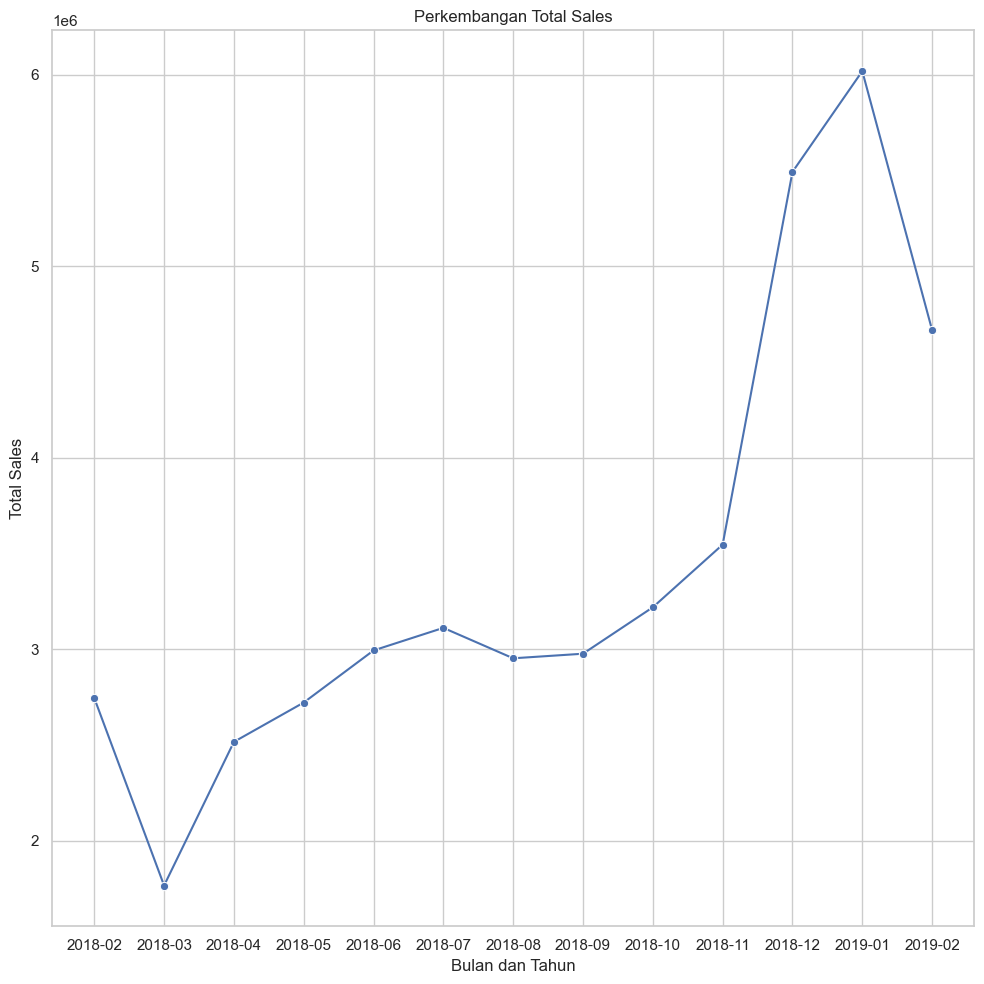

In [24]:
total_sales = df_clean.groupby('year_month')['Amount'].sum().reset_index()
total_sales['Amount'] = total_sales['Amount'].astype(int)
total_sales['year_month'] = total_sales['year_month'].astype(str)

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
sns.lineplot(x=total_sales['year_month'],y=total_sales['Amount'], marker='o', linestyle='-', color='b')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Total Sales',)
plt.title('Perkembangan Total Sales')
plt.tight_layout()

### Performa Akumulasi Sales dan Jumlah User dari Setiap Negara

In [64]:
total_sales_country = df_clean.groupby('Country')['Amount'].sum().reset_index().sort_values('Amount',ascending=False)
total_sales_country['Persentase'] = (total_sales_country['Amount'] / total_sales_country['Amount'].sum())*100
total_sales_country['Jumlah User']=df_clean.groupby('Country')['UserId'].nunique().reset_index()['UserId']
total_sales_country

,Country,Amount,Persentase,Jumlah User
36,United Kingdom,39123427.56,87.471949,3784
14,Germany,1201906.44,2.687216,93
13,France,1058859.36,2.367392,88
10,EIRE,1031102.40,2.305333,4
33,Switzerland,273162.72,0.610736,22
31,Spain,259969.56,0.581239,29
3,Belgium,236029.26,0.527713,25
27,Portugal,178056.54,0.398098,20
25,Norway,160506.72,0.358860,10
24,Netherlands,153581.04,0.343376,7


## Performa Sales Setiap Negara pada Februari 2019


In [27]:
total_sales_country_2019 = df_clean.groupby(['Country','year_month'])['Amount'].sum().reset_index()
total_sales_country_2019['year_month'] = total_sales_country_2019['year_month'].astype(str)
total_sales_country_2019 = total_sales_country_2019[total_sales_country_2019['year_month'] == '2019-02']
total_sales_country_2019=total_sales_country_2019.sort_values('Amount',ascending = False)
total_sales_country_2019['Amount'] = total_sales_country_2019['Amount'].astype(int)
total_sales_country_2019['percentage'] = ((total_sales_country_2019['Amount']/total_sales_country_2019['Amount'].sum())*100).round(3)
total_sales_country_2019[['Country','Amount','percentage']]

,Country,Amount,percentage
284,United Kingdom,4197774,89.951
110,France,109672,2.350
123,Germany,103437,2.216
84,EIRE,98919,2.120
196,Norway,31775,0.681
220,Portugal,23262,0.498
160,Italy,16499,0.354
186,Netherlands,14997,0.321
37,Belgium,13785,0.295
239,Spain,13760,0.295


### Performa Sales di Negara Lain (selain United Kingdom) pada Februari 2019

In [28]:
total_sales_country_no_uk = df_clean.groupby(['Country','year_month'])['Amount'].sum().reset_index()
total_sales_country_no_uk = total_sales_country_no_uk[total_sales_country_no_uk['Country'] != 'United Kingdom']
total_sales_country_no_uk['year_month'] = total_sales_country_no_uk['year_month'].astype(str)
total_sales_country_no_uk = total_sales_country_no_uk[total_sales_country_no_uk['year_month'] == '2019-02']
total_sales_country_no_uk['Percentage'] = (total_sales_country_no_uk['Amount']/total_sales_country_no_uk['Amount'].sum())*100
total_sales_country_no_uk = total_sales_country_no_uk.sort_values('Amount',ascending=False)
total_sales_country_no_uk[['Country','Amount','Percentage']]

,Country,Amount,Percentage
110,France,109672.02,23.385347
123,Germany,103437.54,22.055970
84,EIRE,98919.66,21.092623
196,Norway,31775.64,6.775515
220,Portugal,23262.84,4.960332
160,Italy,16499.46,3.518177
186,Netherlands,14997.60,3.197936
37,Belgium,13785.36,2.939450
239,Spain,13760.52,2.934153
71,Denmark,7089.84,1.511765


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_7932\4022985974.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=total_sales_country_no_uk['Country'],x=total_sales_country_no_uk['Amount'],orient='h',palette='magma')


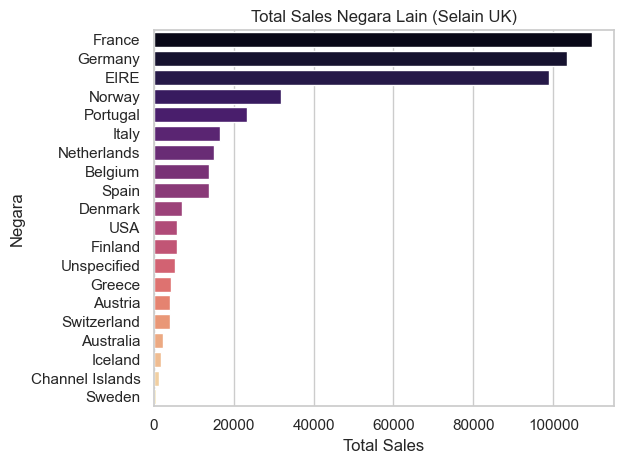

In [29]:
sns.barplot(y=total_sales_country_no_uk['Country'],x=total_sales_country_no_uk['Amount'],orient='h',palette='magma')
plt.title('Total Sales Negara Lain (Selain UK)')
plt.xlabel('Total Sales')
plt.ylabel('Negara')
plt.tight_layout()

## Mengetahui Best Performing Product

In [30]:
product_sales = df_clean.groupby(['ItemDescription']).agg(
    Jumlah_Pembelian = ('NumberOfItemsPurchased','sum')
).reset_index()
product_sales = product_sales.sort_values('Jumlah_Pembelian',ascending=False)
product_sales

,ItemDescription,Jumlah_Pembelian
2188,PACK OF 72 RETROSPOT CAKE CASES,98016
204,ASSORTED COLOUR BIRD ORNAMENT,86490
1704,JUMBO BAG RED RETROSPOT,84168
3621,WHITE HANGING HEART T-LIGHT HOLDER,70164
1873,LUNCH BAG RED RETROSPOT,64542
...,...,...
2869,SET 10 CARDS SNOWY ROBIN 17099,6
2872,SET 10 CARDS TRIANGLE ICONS 17220,6
1010,DUSTY PINK CHRISTMAS TREE 30CM,6
1017,EASTER CRAFT IVY WREATH WITH CHICK,6


# User Segmentation Analysis (United Kingdom)

In [31]:
# Memilih User dari United Kingdom
df_user = df_clean[df_clean['Country'] == 'United Kingdom']
df_user

,TransactionTime,year_month,TransactionId,UserId,Country,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Amount
1,2018-12-26 09:06:00,2018-12,6283376,337701,United Kingdom,482370,LONDON BUS COFFEE MUG,3,3.52,10.56
3,2018-06-22 07:14:00,2018-06,6044973,380478,United Kingdom,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,5.19
4,2018-09-10 11:58:00,2018-09,6143225,0,United Kingdom,1733592,WASHROOM METAL SIGN,3,3.40,10.20
5,2019-01-11 09:50:00,2019-01,6307136,285957,United Kingdom,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,42.24
6,2018-09-28 10:51:00,2018-09,6162981,345954,United Kingdom,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,61.56
...,...,...,...,...,...,...,...,...,...,...
1083810,2018-08-12 11:53:00,2018-08,6106650,0,United Kingdom,446040,BLUE POLKADOT CUP,6,2.25,13.50
1083811,2018-04-16 10:37:00,2018-04,5973242,352191,United Kingdom,466599,LOVEBIRD HANGING DECORATION WHITE,24,1.18,28.32
1083814,2019-02-16 09:14:00,2019-02,6387117,295743,United Kingdom,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,68.34
1083815,2019-02-05 05:26:00,2019-02,6361817,0,United Kingdom,497595,DOILY THANK YOU CARD,15,1.15,17.25


In [32]:
# Aggregate Data
df_user = df_user.groupby(['Country','UserId']).agg(
    order_cnt = ('TransactionId','nunique'),
    recent_order = ('TransactionTime','max'),
    order_amount = ('Amount','sum')
).reset_index()
# Menghilangkan userid = 0
df_user = df_user[df_user['UserId']!= '0']
df_user['order_amount'] = df_user['order_amount'].astype(int)
df_user

,Country,UserId,order_cnt,recent_order,order_amount
1,United Kingdom,267687,11,2019-02-18 10:34:00,22429
2,United Kingdom,267708,197,2019-02-20 08:20:00,179849
3,United Kingdom,267729,5,2019-02-17 05:56:00,23984
4,United Kingdom,269220,4,2019-02-17 11:12:00,7665
5,United Kingdom,269241,1,2018-07-21 11:51:00,628
...,...,...,...,...,...
3779,United Kingdom,383880,1,2018-05-19 05:52:00,1332
3780,United Kingdom,383901,1,2018-08-24 06:53:00,388
3781,United Kingdom,383922,2,2019-02-13 07:43:00,937
3782,United Kingdom,383943,16,2019-02-17 08:02:00,16985


In [33]:
# Membuat variable today berdasarkan order terakhir dari seluruh user
today = df_user['recent_order'].max()
today

Timestamp('2019-02-20 08:49:00')

In [34]:
df_user['days_since_last_order'] = today - df_user['recent_order']
df_user['days_since_last_order'] = df_user['days_since_last_order'].dt.days

In [35]:
# Frequency Binning
freq_bins = [0,
             np.percentile(df_user['order_cnt'],20),
             np.percentile(df_user['order_cnt'],40),
             np.percentile(df_user['order_cnt'],60),
             np.percentile(df_user['order_cnt'],80),
             np.max(df_user['order_cnt'])
             ]



# Recency Binning
rec_bins = [0,
            np.percentile(df_user['days_since_last_order'],20),
            np.percentile(df_user['days_since_last_order'],40),
            np.percentile(df_user['days_since_last_order'],60),
            np.percentile(df_user['days_since_last_order'],80),
            np.max(df_user['days_since_last_order'])
            ]

# Monetary binning
mon_bins = [0,
            np.percentile(df_user['order_amount'],20),
            np.percentile(df_user['order_amount'],40),
            np.percentile(df_user['order_amount'],60),
            np.percentile(df_user['order_amount'],80),
            np.max(df_user['order_amount'])
            ]

df_user['frequency_score'] = pd.cut(x=df_user['order_cnt'],bins=freq_bins,labels=[1,2,3,4,5],include_lowest = True)
df_user['recency_score'] = pd.cut(df_user['days_since_last_order'],bins=rec_bins,labels=[5,4,3,2,1],include_lowest = True)
df_user['monetary_score'] = pd.cut(df_user['order_amount'],bins=mon_bins,labels=[1,2,3,4,5],include_lowest = True)

df_user.sample(20)

,Country,UserId,order_cnt,recent_order,order_amount,days_since_last_order,frequency_score,recency_score,monetary_score
2927,United Kingdom,357735,2,2018-06-20 07:23:00,3154,245,2,1,3
2343,United Kingdom,340221,4,2019-02-17 12:02:00,14451,2,4,5,5
2362,United Kingdom,340662,1,2018-04-08 09:38:00,5888,317,1,1,4
1414,United Kingdom,312270,1,2018-06-04 06:51:00,2713,261,1,1,2
1532,United Kingdom,316197,2,2018-05-21 11:17:00,6694,274,2,1,4
3360,United Kingdom,371007,5,2018-12-16 10:32:00,14703,65,4,3,5
2386,United Kingdom,341376,1,2018-05-30 08:18:00,1409,266,1,1,1
3291,United Kingdom,369012,4,2018-12-11 13:53:00,1717,70,4,2,2
2724,United Kingdom,351708,5,2019-02-03 06:17:00,12589,17,4,4,5
3400,United Kingdom,372036,10,2019-01-22 11:59:00,37238,28,5,4,5


In [36]:
df_user['segmentation'] = np.select([
    (df_user['frequency_score'] >= 4) & (df_user['recency_score'] == 5),
    (df_user['frequency_score'] >= 4) & (df_user['recency_score'].between(4,3)),
    (df_user['frequency_score'] == 5) & (df_user['recency_score'].between(2,1)),
    (df_user['frequency_score'].between(2,3)) & (df_user['recency_score'].between(5,4)),
    (df_user['frequency_score'] == 3) & (df_user['recency_score'] == 3),
    (df_user['frequency_score'].between(3,4)) & (df_user['recency_score'].between(2,1)),
    (df_user['frequency_score'] == 1) & (df_user['recency_score'] == 5),
    (df_user['frequency_score'] == 1) & (df_user['recency_score'] == 4),
    (df_user['frequency_score'].between(1,2)) & (df_user['recency_score'] == 3),
    (df_user['frequency_score'].between(1,2)) & (df_user['recency_score'].between(2,1))
],['01.Champions','02.Loyal Customers','03.Can\'t Loose Them','04. Potential Loyalist','05. Need Attention','06. At Risk',
   '07.New Customers','08.Promising','09.About to Sleep','10. Hibernating']
)
df_user

,Country,UserId,order_cnt,recent_order,order_amount,days_since_last_order,frequency_score,recency_score,monetary_score,segmentation
1,United Kingdom,267687,11,2019-02-18 10:34:00,22429,1,5,5,5,01.Champions
2,United Kingdom,267708,197,2019-02-20 08:20:00,179849,0,5,5,5,01.Champions
3,United Kingdom,267729,5,2019-02-17 05:56:00,23984,3,4,5,5,01.Champions
4,United Kingdom,269220,4,2019-02-17 11:12:00,7665,2,4,5,4,01.Champions
5,United Kingdom,269241,1,2018-07-21 11:51:00,628,213,1,1,1,10. Hibernating
...,...,...,...,...,...,...,...,...,...,...
3779,United Kingdom,383880,1,2018-05-19 05:52:00,1332,277,1,1,1,10. Hibernating
3780,United Kingdom,383901,1,2018-08-24 06:53:00,388,180,1,1,1,10. Hibernating
3781,United Kingdom,383922,2,2019-02-13 07:43:00,937,7,2,5,1,04. Potential Loyalist
3782,United Kingdom,383943,16,2019-02-17 08:02:00,16985,3,5,5,5,01.Champions


In [37]:
user_segmentation =df_user.groupby(['Country','segmentation']).agg(
    jumlah_User = ('UserId','nunique'),
    rata_rata_pembelian_terakhir = ('days_since_last_order','mean'),
    rat_rata_frekuensi_pembelian = ('order_cnt','mean'),
).reset_index()
user_segmentation['persentase'] = ((user_segmentation['jumlah_User']/user_segmentation['jumlah_User'].sum())*100).round(2)
user_segmentation

,Country,segmentation,jumlah_User,rata_rata_pembelian_terakhir,rat_rata_frekuensi_pembelian,persentase
0,United Kingdom,01.Champions,521,4.934741,11.694818,13.77
1,United Kingdom,02.Loyal Customers,573,31.481675,6.904014,15.15
2,United Kingdom,03.Can't Loose Them,55,131.709091,8.145455,1.45
3,United Kingdom,04. Potential Loyalist,449,15.757238,2.423163,11.87
4,United Kingdom,05. Need Attention,104,48.971154,3.000000,2.75
5,United Kingdom,06. At Risk,274,132.102190,3.562044,7.24
6,United Kingdom,07.New Customers,59,6.338983,1.000000,1.56
7,United Kingdom,08.Promising,158,22.867089,1.000000,4.18
8,United Kingdom,09.About to Sleep,411,50.992701,1.369830,10.86
9,United Kingdom,10. Hibernating,1179,204.023749,1.279898,31.17


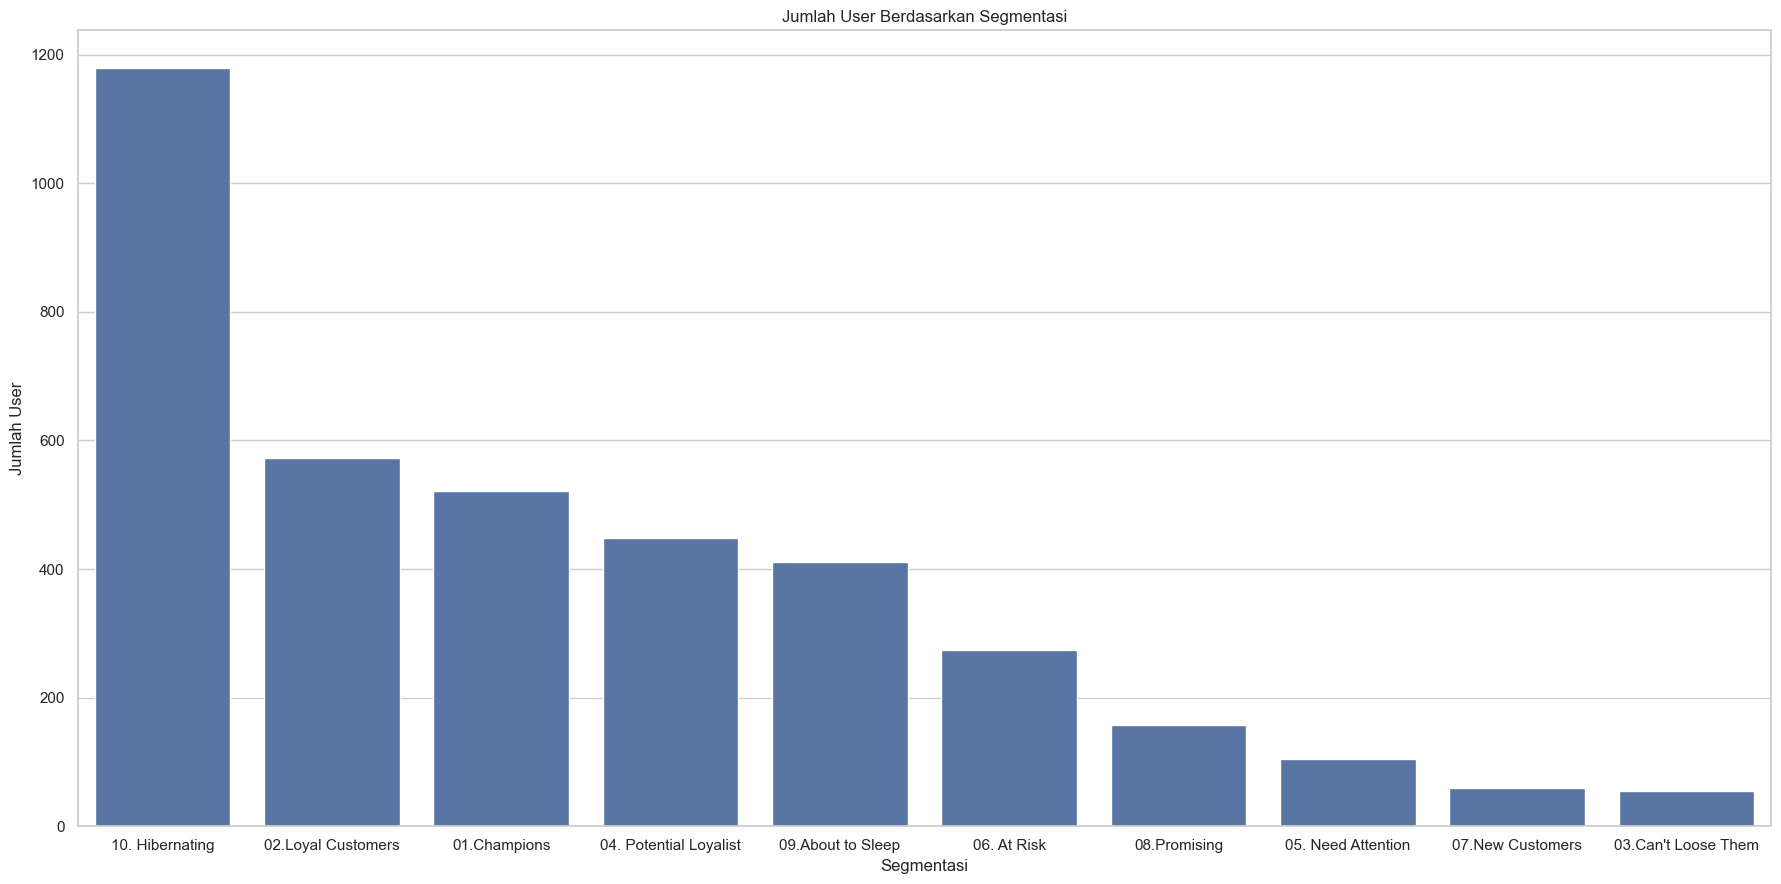

In [49]:
user_segmentation= user_segmentation.sort_values('persentase',ascending=False)

fig, ax = plt.subplots(figsize=(18,9))
sns.barplot(x=user_segmentation['segmentation'],y=user_segmentation['jumlah_User'],orient='v')
plt.title('Jumlah User Berdasarkan Segmentasi')
plt.xlabel('Segmentasi')
plt.ylabel('Jumlah User')
plt.tight_layout()